# Support Vector Machines

A  Support  Vector  Machine  (SVM)  is  a  powerful  and  versatile  Machine  Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning, and any one interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

## Linear SVM Classification

The fundamental idea behind SVMs is best explained with some pictures. Figure below shows  part  of  the  iris  dataset.  The  two classes can clearly be separated easily with a straight line (they are linearly separable). The  left  plot  shows  the  decision  boundaries  of  three  possible  linear  classifiers.  The model  whose  decision  boundary  is  represented  by  the  dashed  line  is  so  bad  that  it does not even separate the classes properly. The other two models work perfectly on this  training  set,  but  their  decision  boundaries  come  so  close  to  the  instances  that these  models  will  probably  not  perform  as  well  on  new  instances.  In  contrast,  the solid line in the plot on the right represents the decision boundary of an SVM classifier;  this  line  not  only  separates  the  two  classes  but  also  stays  as  far  away  from  the closest training instances as possible. You can think of an SVM classifier as fitting the widest  possible  street  (represented  by  the  parallel  dashed  lines)  between  the  classes. This is called large margin classification.

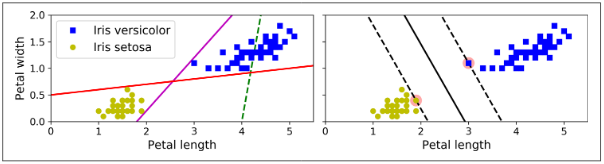

Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge  of  the  street.  These  instances  are  called  the  support  vectors (circled in figure below).

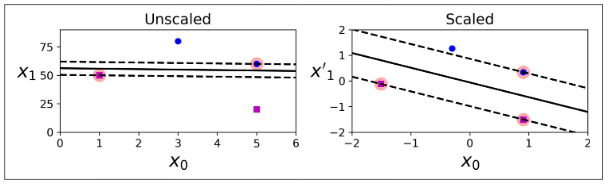

SVMs are sensative to the feature scales.

### Soft Margin Classification

If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers. Figure below shows the iris dataset with just one additional outlier: on the left, it  is  impossible  to  find  a  hard  margin;  on  the  right,  the  decision  boundary  ends  up very different from the one we saw in Figure above without the outlier, and it will prob‐ably not generalize as well.

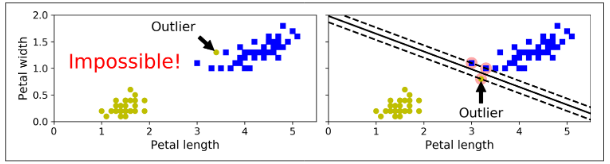

To avoid these issues, use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations(i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.

When creating an SVM model using Scikit-Learn, we can specify a number of hyper‐parameters. C is one of those hyperparameters. If we set it to a low value, then we end up  with  the  model  on  the  left  of  Figure  below.  With  a  high  value,  we  get  the  model  on the right. Margin violations are bad. It’s usually better to have few of them. However, in this case the model on the left has a lot of margin violations but will probably generalize better.

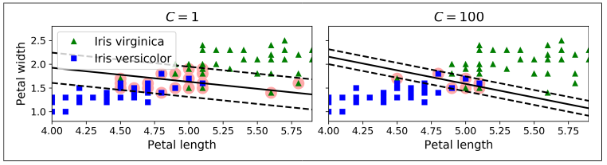

Large margin (left) versus fewer margin violaations (right). If  your  SVM  model  is  overfitting,  you  can  try  regularizing  it  byreducing C.

The  following  Scikit-Learn  code  loads  the  iris  dataset,  scales  the  features,  and  then trains  a  linear  SVM  model  (using  the  LinearSVC  class  with  C=1  and  the  hinge  loss function, described shortly) to detect Iris virginica flowers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"]==2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[4, 1]])

array([0.])

Unlike  Logistic  Regre. Instead of using the LinearSVC class, we could use the SVC class with a linear kernel. When creating the SVC model, we would write SVC(kernel="linear", C=1). Or we could  use  the  SGDClassifier  class,  with  SGDClassifier(loss="hinge", alpha=1/(m*\C)).  This  applies  regular  Stochastic  Gradient  Descent to  train  alinear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle online classification tasks or huge datasets that do not fit in memory(out-of-core training).

## Nonlinear SVM Classification

Although  linear  SVM  classifiers  are  efficient  and  work  surprisingly  well  in  many cases,  many  datasets  are  not  even  close  to  being  linearly  separable.  One  approach  to handling  nonlinear  datasets  is  to  add  more  features,  such  as  polynomial  features;  in  some  cases  this  can  result  in  a  linearly  separable  dataset. Consider  the  left  plot  in  Figure below:  it  represents  a  simple  dataset  with  just  one  feature, x1. This dataset is not linearly separable, as you can see. But if you add a secondfeature x2 = (x1)<sup>2</sup>, the resulting 2D dataset is perfectly linearly separable.

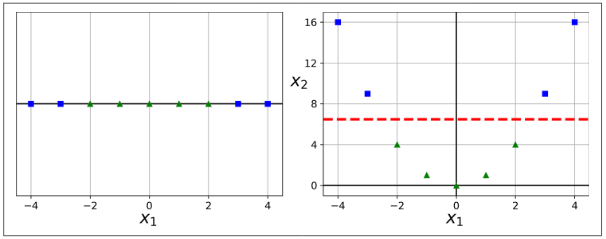

To  implement  this  idea  using  Scikit-Learn,  create  a  Pipeline  containing  a  PolynomialFeatures  transformer,  followed by a StandardScaler and a LinearSVC. Let’s test this on the moons dataset: this is  a  toy  dataset  for  binary  classification  in  which  the  data  points  are  shaped  as  two interleaving  half  circles  (see  Figure  below).  You  can  generate  this  dataset  using  the make_moons() function.

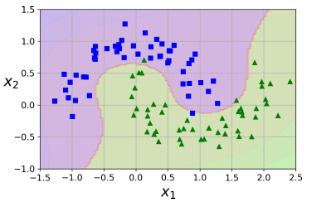

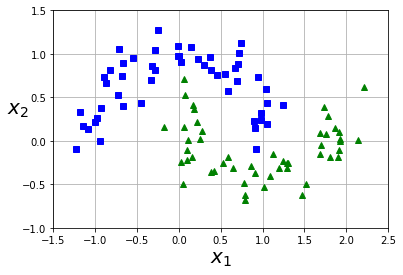

/home/susang/Documents/sunyata/self/HOML-Exercises/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

polynomial_svm_clf.fit(X, y)

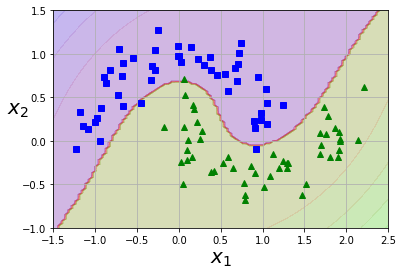

In [4]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
               
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
               
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Kernel

when  using  SVMs  you  can  apply  an  almost  miraculous  mathematical technique  called  the  kernel  trick.  The  kernel  trick  makes  it possible  to  get  the  same  result  as  if  you  had  added  many  polynomial  features,  even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because you don’t actually add any  features.  This  trick  is  implemented  by  the  SVC  class.  Let’s  test  it  on  the  moonsdataset:

In [5]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [6]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

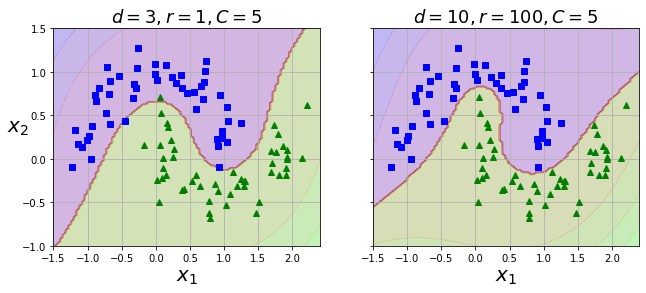

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

This code (first block) trains an SVM classifier using a third-degree polynomial kernel. It is repre‐sented on the left in Figure above. On the right is another SVM classifier (second block) using a 10th-degree polynomial kernel. Obviously, if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it.  The  hyperparameter  coef0  controls  how  much  the  model  is  influenced  by  high-degree polynomials versus low-degree polynomials